여러분들께 드리는 데이터는 총 4개 입니다.

- entry_data: '모두 스터디카페'의 시간별 입장 기록 데이터 
- sales_data: '모두 스터디카페'의 시간별 음식/음료 판매 데이터
- item_data: '모두 스터디카페'에서 판매하고 있는 음식/음료 종류와 가격
- item_entry_data: '모두 스터디카페'에서 판매하고 있는 입장권 종류와 가격

여러분들을 믿고 있겠습니다. 잘 부탁해요.
아! 아래 내용에 대한 시각화는 꼭 포함되어 있어야 합니다.

- 월별 매출액 추세
- 가장 인기있는 음식/음료
- 가장 많이 팔린 입장권 종류


# 3-1 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [4]:
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [5]:
entry_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [6]:
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


### 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)

In [7]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [8]:
item_data

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
...,...,...,...,...
169,170,커피,카페모카(ICE),"2,500원"
170,171,커피,헤이즐넛라떼(ICE),"2,500원"
171,172,포장,오늘은 순살닭다리 덮밥,"9,000원"
172,173,포장,오늘은 한돈간장불고기,"8,000원"


In [9]:
item_entry_data

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


In [10]:
sales_data['date']=sales_data['결제일시'].str[:7]

In [11]:
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',', '').astype(int)
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [12]:
grouped = sales_data['결제금액'].groupby(sales_data['date']).sum()
grouped

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_te

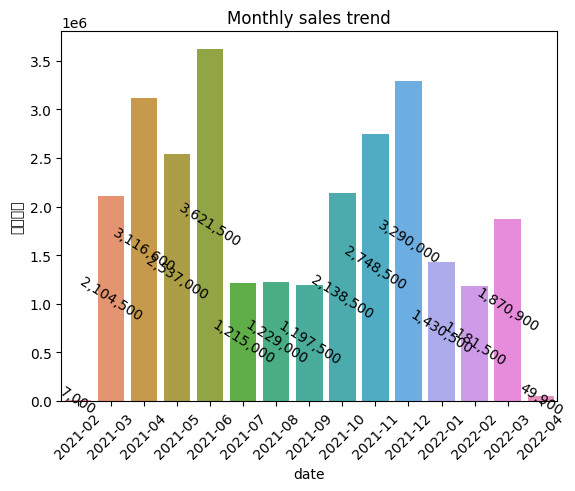

In [13]:
ax = sns.barplot(data = grouped.reset_index(),x='date',y='결제금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center',rotation=-32)
plt.xticks(rotation=45)
plt.title('Monthly sales trend')
plt.show()

In [13]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


### 필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)

In [14]:
temp_var1 = sales_data[sales_data['판매수량']==1]
temp_var1

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7097,2021-02-17 13:48,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7098,2021-02-17 13:50,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7099,2021-02-17 13:46,카운터,아메리카노(HOT),현금,결제완료,1,3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02


In [15]:
temp_var1['상품명'].value_counts()

김치볶음밥          1204
라면              749
짜장라면            455
치즈불고기볶음밥        420
계란추가            314
               ... 
라면(계란/치즈추가)       1
녹차(HOT)           1
짜장라면(계란추가)        1
이어폰(커널형)          1
오늘은 한돈간장불고기       1
Name: 상품명, Length: 100, dtype: int64

In [21]:
df1 = pd.DataFrame(temp_var1['상품명'].value_counts().reset_index())
df1.columns = ['상품명', '판매개수']
df1

,상품명,판매개수
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
...,...,...
95,라면(계란/치즈추가),1
96,녹차(HOT),1
97,짜장라면(계란추가),1
98,이어폰(커널형),1


In [19]:
temp_var2 = sales_data[sales_data['판매수량']==-1]
temp_var2

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
22,2022-03-31 11:31,카운터,아메리카노(ICE),신용카드,판매취소,-1,-4400,NaN,2022-03
28,2022-03-31 11:13,카운터,아메리카노(ICE),신용카드,판매취소,-1,-4400,NaN,2022-03
89,2022-03-26 20:17,선불기1,아메리카노(ICE),신용카드,판매취소,-1,-4400,NaN,2022-03
91,2022-03-26 20:16,선불기1,아메리카노(HOT),신용카드,판매취소,-1,-3900,NaN,2022-03
92,2022-03-26 20:16,선불기1,크로플,신용카드,판매취소,-1,-5500,NaN,2022-03
...,...,...,...,...,...,...,...,...,...
7092,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7093,2021-02-17 14:21,카운터,카페라떼(HOT),현금,결제취소,-1,-4000,NaN,2021-02
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02


In [20]:
temp_var2['상품명'].value_counts()

아메리카노(ICE)      30
아메리카노(HOT)      16
샷추가             10
아이스티             8
김치볶음밥            7
라면               7
카페라떼(HOT)        6
2인라면             5
초코라떼(ICE)        4
카페모카(HOT)        4
쿠키(오트밀)          4
시럽추가             3
청귤차(HOT)         3
바닐라라떼(HOT)       3
치즈불고기볶음밥         3
새우볶음밥            2
초코머핀             2
카페모카(ICE)        2
카모마일(ICE)        2
낙지볶음밥            2
블루베리스무디          2
청귤차(ICE)         2
레몬에이드            2
레몬차(ICE)         2
유자차(HOT)         2
짜장라면             2
자몽에이드            2
유자에이드            1
허니밀크쉐이크          1
계란추가             1
헤이즐넛라떼(ICE)      1
쿠앤크쉐이크           1
크로플              1
카라멜마끼아또(ICE)     1
민트초코라떼(ICE)      1
치즈감자튀김           1
쿠키(초코칩)          1
카모마일(HOT)        1
바닐라라떼(ICE)       1
자몽차(ICE)         1
딸기스무디            1
쿠키(마카다미아)        1
자몽차(HOT)         1
카페라떼(ICE)        1
치즈추가             1
녹차라떼(HOT)        1
블루베리머핀           1
녹차라떼(ICE)        1
초코쉐이크            1
불닭볶음면            1
Name: 상품명, dtype: int64

In [22]:
df2 = pd.DataFrame(temp_var2['상품명'].value_counts().reset_index())
df2.columns = ['상품명', '환불개수']
df2

,상품명,환불개수
0,아메리카노(ICE),30
1,아메리카노(HOT),16
2,샷추가,10
3,아이스티,8
4,김치볶음밥,7
5,라면,7
6,카페라떼(HOT),6
7,2인라면,5
8,초코라떼(ICE),4
9,카페모카(HOT),4


In [27]:
total_temp = pd.merge(df1,df2)
total_temp['순수판매개수']=total_temp['판매개수']-total_temp['환불개수']
total_temp 



,상품명,판매개수,환불개수,순수판매개수
0,김치볶음밥,1204,7,1197
1,라면,749,7,742
2,짜장라면,455,2,453
3,치즈불고기볶음밥,420,3,417
4,계란추가,314,1,313
5,낙지볶음밥,312,2,310
6,새우볶음밥,309,2,307
7,아메리카노(ICE),284,30,254
8,치즈감자튀김,246,1,245
9,치즈추가,182,1,181


In [30]:
a = total_temp.head(10)

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_

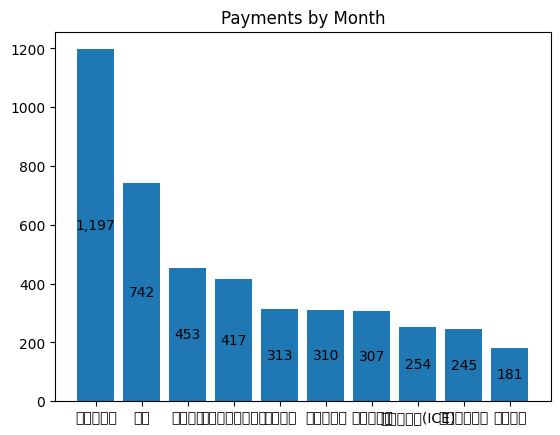

In [31]:
ax = plt.bar(a['상품명'], a['순수판매개수'])

plt.bar_label(ax,labels =[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payments by Month')
plt.show()

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


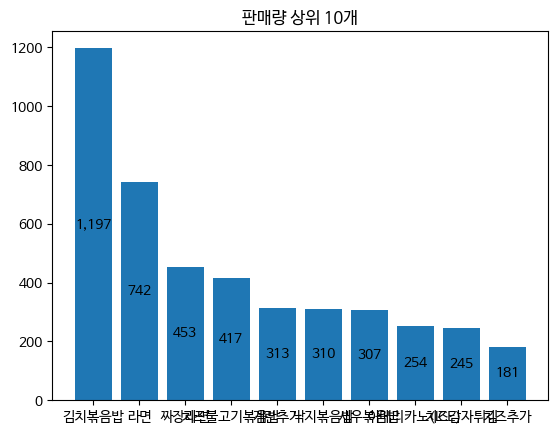

In [33]:
ax = plt.bar(a['상품명'], a['순수판매개수'])

plt.bar_label(ax,labels =[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('판매량 상위 10개')
plt.show()

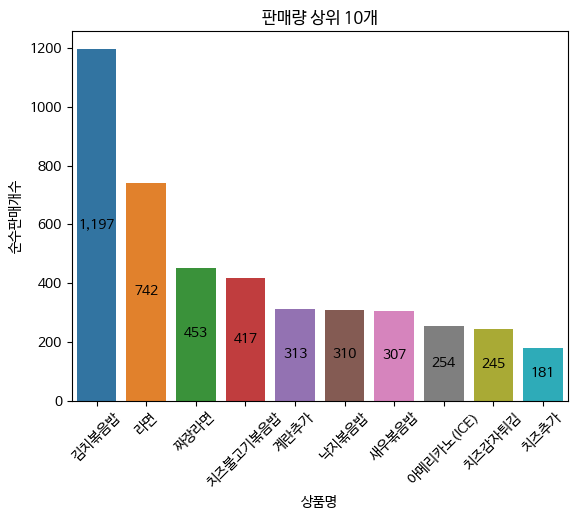

In [34]:
ax = sns.barplot(data=a,x='상품명',y='순수판매개수')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('판매량 상위 10개')
plt.xticks(rotation=45)
plt.show()

In [23]:
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7097,2021-02-17 13:48,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7098,2021-02-17 13:50,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7099,2021-02-17 13:46,카운터,아메리카노(HOT),현금,결제완료,1,3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02


In [40]:
grouped1 = temp_var1['결제금액'].groupby(temp_var1['상품명']).sum()
payment1 = grouped1.sort_values(ascending=False).reset_index()
payment1.index = payment1.index+1
payment1

,상품명,결제금액
1,김치볶음밥,6004400
2,라면,2941500
3,치즈불고기볶음밥,2292600
4,짜장라면,2038500
5,낙지볶음밥,1710700
...,...,...
96,비엔나소세지(토핑),3000
97,(밥)계란후라이 추가,3000
98,이어폰(커널형),3000
99,(밥)체다치즈추가,2000


In [41]:
grouped2 = temp_var2['결제금액'].groupby(temp_var2['상품명']).sum()
payment2 = grouped2.sort_values(ascending=False).reset_index()
payment2.index = payment2.index+1
payment2

,상품명,결제금액
1,2인라면,-500
2,치즈추가,-500
3,계란추가,-500
4,쿠키(초코칩),-1500
5,쿠키(마카다미아),-1500
6,시럽추가,-1500
7,블루베리머핀,-3500
8,카모마일(HOT),-4000
9,자몽차(ICE),-4000
10,자몽차(HOT),-4000


In [48]:
total_grouped = pd.merge(payment1,payment2, on='상품명')
total_grouped['결제금액'] = total_grouped['결제금액_x']+total_grouped['결제금액_y']
total_grouped = total_grouped.drop(['결제금액_x','결제금액_y'],axis=1)
total_grouped

,상품명,결제금액
0,김치볶음밥,5971900
1,라면,2916000
2,치즈불고기볶음밥,2276100
3,짜장라면,2032500
4,낙지볶음밥,1699700
5,새우볶음밥,1529800
6,치즈감자튀김,1348700
7,아메리카노(ICE),936100
8,불닭볶음면,688500
9,초코머핀,581000


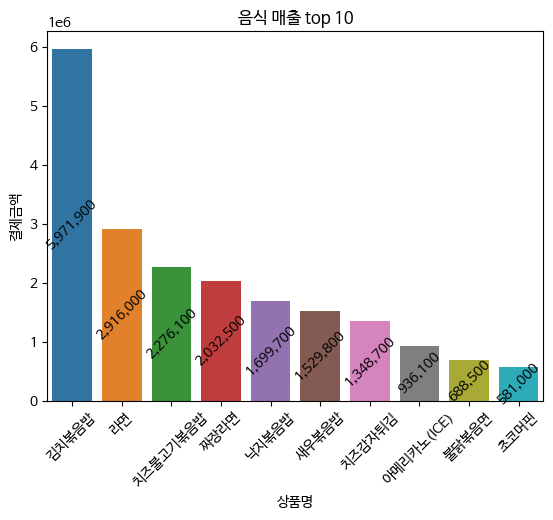

In [49]:
ax = sns.barplot(data=total_grouped.head(10),x='상품명',y='결제금액')
containers = ax.containers[0]
ax.bar_label(containers,labels=[f'{x:,.0f}' for x in containers.datavalues],label_type='center',rotation=45)
plt.title('음식 매출 top 10')
plt.xticks(rotation=45)
plt.show()

In [26]:
entry_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


### 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)

In [27]:
temp_var = entry_data['금액'].groupby(entry_data['요금제명']).sum()
tickets = temp_var.sort_values(ascending=False).reset_index()
tickets.index = tickets.index+1
tickets


,요금제명,금액
1,한국대생 입장권(종일권),70037000
2,입장권(종일권),23570500
3,심야-조조무제한(06시까지),11600000
4,심야-조조무제한,6221000
5,한국대생 무제한 입장권,5207500
6,시간요금제(1시간),2665500
7,시간요금제(3시간),2042000
8,무제한 입장권,1568600
9,18시이후 무제한,1330500
10,조조무제한,693000


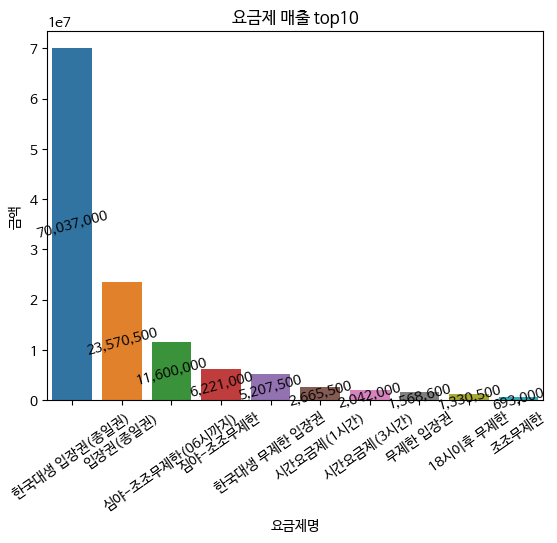

In [28]:
ax = sns.barplot(data=tickets.head(10),x='요금제명',y='금액')
containers = ax.containers[0]
ax.bar_label(containers,labels=[f'{x:,.0f}' for x in containers.datavalues],label_type='center',rotation=15)
plt.xticks(rotation=35)
plt.title('요금제 매출 top10')
plt.show()

# 내가 정의한 문제 해결하기
# entry_data에서 월별 입장권 매출/시각화


In [29]:
entry_data['date'] = entry_data['입실'].str[:7]
entry_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,date
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,2022-04
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,2022-04
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,2022-04
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,2022-04
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928,2022-04
...,...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,2021-02
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,2021-02
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,2021-02
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,2021-02


In [30]:
temp_var = entry_data['금액'].groupby(entry_data['date']).sum()
temp_var.reset_index()

,date,금액
0,2021-02,292800
1,2021-03,9831500
2,2021-04,16440000
3,2021-05,15073500
4,2021-06,15856500
5,2021-07,4783000
6,2021-08,3837000
7,2021-09,3815000
8,2021-10,9202500
9,2021-11,15157000


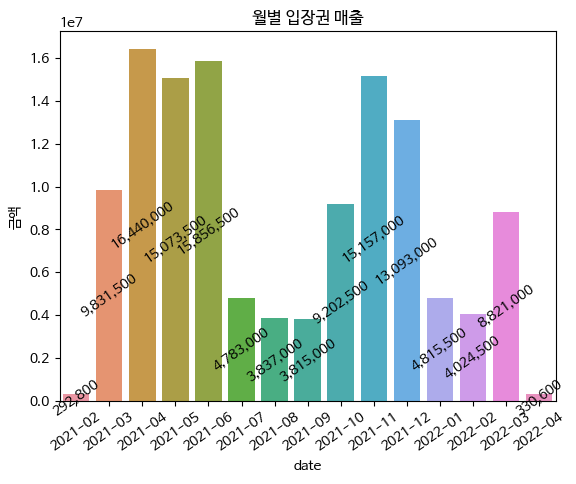

In [31]:
ax = sns.barplot(data=temp_var.reset_index(),x='date',y='금액')
containers = ax.containers[0]
ax.bar_label(containers,labels=[f'{x:,.0f}' for x in containers.datavalues],label_type='center',rotation=35)
plt.xticks(rotation=35)
plt.title('월별 입장권 매출')
plt.show()

### 월별 입장권 매출을 시각화 한 결과 다음과 같은 사실을 알 수 있음
- 모두스터디카페는 한국대생 입장권이 있는 것으로 보아 대학가의 스터디 카페
- 학기 기간에 매출이 높고, 방학 기간에는 매출이 적은 결과가 보이고, 특히 시험기간에 가장 높은 매출을 보인다.
- 그리고 월별 음식/음료 매출 또한 비슷한 형태의 그래프가 나타남.

### 학기 중, 개강 시기인 3,9월의 고객확보를  위해 3,9월 등록 시 다양한 이벤트를 진행하면 이 때 등록한 고객들 중 일부가 재등록 가능성 있음.
- ex) 지금 등록하면 사물함 무료, 일정 비율의 시간 추가 제공, 음식/음료 할인도 어느 정도 필요하다고 생각이 든다.

### 방학 기간 매출 확보를 위한 전략
- 매출, 고객확보가 중요함
- 방학 기간 중 등록을 하면 가격 할인을 통해 매출, 고객을 확보하고 방학 기간에 등록한 시간은 학기 초(3,9월)까지 사용 가능하도록 이벤트를 하면 방학 기간의 매출 올리기 가능


# !7,8,9월 / 10,11,12월의 입장권 매출액 분석!


In [32]:
new_entry_data1 = entry_data[(entry_data['date'] == '2021-07') | (entry_data['date'] == '2021-08') | (entry_data['date'] == '2021-09')]
result1 = new_entry_data1['금액'].groupby(new_entry_data1['date']).sum().reset_index()

result_1 = result1.sum()
result_1.reset_index()




,index,0
0,date,2021-072021-082021-09
1,금액,12435000


In [33]:
new_entry_data2 = entry_data[(entry_data['date'] == '2021-10') | (entry_data['date'] == '2021-11') |(entry_data['date'] == '2021-12')]
result2 = new_entry_data2['금액'].groupby(new_entry_data2['date']).sum().reset_index()
result_2 = result2.sum()
result_1.reset_index()


,index,0
0,date,2021-072021-082021-09
1,금액,12435000


In [34]:
result3 = pd.concat([result_1.reset_index(),result_2.reset_index()])
result3.reset_index()
result_3 = result3.drop(index=0).reset_index(drop=True)
result_3

,index,0
0,금액,12435000
1,금액,37452500


In [35]:
row_to_sub = result_3.loc[1]
column_to_sub = 0
sub_value = result_3.loc[1, column_to_sub] - result_3.loc[0, column_to_sub]
new_row = row_to_sub.copy()
new_row[column_to_sub] = sub_value
result_3 = result_3.append(new_row, ignore_index=True)
result_3


,index,0
0,금액,12435000
1,금액,37452500
2,금액,25017500


#### 2021년 2학기 기준으로 방학과 학기 중 입장권 매출액 차이는 약 2500만원
#### 방학 이벤트로 기존 학기의 매출은 유지하거나 증가한 채로, 이러한 차이를 줄이는 전략이 필요하다.

# !회고!

### 본 프로젝트에서는 한 주 동안 배운 데이터분석 기술을 활용하여 스터디카페의 매출을 분석하는 실습이었다 . 노드를 진행하면서 내용을 모른채로 코드를 따라해서 더 정확한 진행을 위해 주말에 복습을 하고 시작했다.
### 공통 문제에 대해서는 어렵지 않게 진행이 가능했다. 그 이외에 우리 조에서 우리만의 데이터를 분석하는 과정에서 고민이 많았지만 대학가 주변의 카페라는 점을 이용하여 분석하는 것 말고는 큰 성과가 없어 아쉽다. 